# Import statistical and graphical libraries

In [1]:
import pysal as ps
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import datetime
import prettyplotlib as ppl

from scipy import stats
import statsmodels.api as sm

import watermark


pd.set_option("max_columns", None)

sns.set_style('whitegrid')

%matplotlib inline

%config InlineBackend.figure_format = 'retina'

%watermark -v -d -a 'Mario Javier Carrillo' -p matplotlib,numpy,pandas

%load_ext watermark
%watermark -v -d -a 'Mario Javier Carrillo' -p matplotlib,numpy,pandas




/home/java/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
ERROR:root:Line magic function `%watermark` not found.


Mario Javier Carrillo 2018-01-28 

CPython 3.6.3
IPython 6.1.0

matplotlib 2.1.0
numpy 1.13.3
pandas 0.20.3


# Loading data to pandas df

In [36]:
df = pd.read_csv('/home/java/Desktop/HORIZON2020/DATASETS/NATURE_CRIME/Type_crime.csv')
df.head



<bound method NDFrame.head of             STATE/UT  YEAR         Place Of Occurrence  \
0     Andhra Pradesh  2001        RESIDENTIAL PREMISES   
1     Andhra Pradesh  2001                    HIGH-WAY   
2     Andhra Pradesh  2001                 RIVER & SEA   
3     Andhra Pradesh  2001                    RAILWAYS   
4     Andhra Pradesh  2001              RUNNING TRAINS   
5     Andhra Pradesh  2001                 OTHERS RLY.   
6     Andhra Pradesh  2001                       BANKS   
7     Andhra Pradesh  2001   COMMERCIAL ESTABLISHMENTS   
8     Andhra Pradesh  2001                OTHER PLACES   
9     Andhra Pradesh  2001              TOTAL (MANUAL)   
10    Andhra Pradesh  2001  TOTAL COMPUTER FROM 1 TO 7   
11    Andhra Pradesh  2002        RESIDENTIAL PREMISES   
12    Andhra Pradesh  2002                    HIGH-WAY   
13    Andhra Pradesh  2002                 RIVER & SEA   
14    Andhra Pradesh  2002                    RAILWAYS   
15    Andhra Pradesh  2002              RU

# Data Cleaning

In [37]:
df.rename(columns={'STATE/UT':'STATE_UT','Place Of Occurrence':'PLACE_OCCURENCE',
'Dacoity (Section 395-398 IPC) - Number of cases registered':'DACOITY_NUM',
    'Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees)':'VALUE_DACOITY',
    'Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered':'ROBBERY_NO',
    'Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)':'ROBBERY_VALUE',
    'Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered':'BURGLARY_NO',
     'Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)':'BURGLARY_VALUE',
    'Theft (Section 379-382 IPC) - Number of cases registered':'THEFT_NO',
   'Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)':'THEFT_VALUE'},inplace=True)
#print(df)

df.columns




Index(['STATE_UT', 'YEAR', 'PLACE_OCCURENCE', 'DACOITY_NUM', 'VALUE_DACOITY',
       'ROBBERY_NO', 'ROBBERY_VALUE', 'BURGLARY_NO', 'BURGLARY_VALUE',
       'THEFT_NO', 'THEFT_VALUE'],
      dtype='object')

In [38]:
df['STATE_UT'] = df.STATE_UT.str.replace('\s+&\s+', '&')

df


,STATE_UT,YEAR,PLACE_OCCURENCE,DACOITY_NUM,VALUE_DACOITY,ROBBERY_NO,ROBBERY_VALUE,BURGLARY_NO,BURGLARY_VALUE,THEFT_NO,THEFT_VALUE
0,Andhra Pradesh,2001,RESIDENTIAL PREMISES,100,4446961,177,5962460,5158,105324332,4257,53517835
1,Andhra Pradesh,2001,HIGH-WAY,57,5340335,172,6364866,31,2000574,74,1593092
2,Andhra Pradesh,2001,RIVER & SEA,2,145345,11,209330,101,1412516,110,1610200
3,Andhra Pradesh,2001,RAILWAYS,8,1750800,19,304336,6,24392,943,16418110
4,Andhra Pradesh,2001,RUNNING TRAINS,5,75000,3,164000,0,0,296,6170175
5,Andhra Pradesh,2001,OTHERS RLY.,3,1675800,16,140336,6,24392,647,10247935
6,Andhra Pradesh,2001,BANKS,0,0,2,151200,21,3300,16,637735
7,Andhra Pradesh,2001,COMMERCIAL ESTABLISHMENTS,10,11300237,16,816006,1041,26920123,2502,20121181
8,Andhra Pradesh,2001,OTHER PLACES,37,6144020,232,9064079,862,11334111,8849,130206356
9,Andhra Pradesh,2001,TOTAL (MANUAL),214,29127698,629,22872277,7220,147019348,16751,224104509


# No of Dacoity happened at highways from 2001-2013 vs states

In [39]:
import altair as alt
from altair import *
from altair import Chart, Color, Scale, X, Y
from altair import Chart, Color, Scale
from IPython.display import display

def sub_frame(dataset, group_cols=['STATE_UT','YEAR'], col_name = 'PLACE_OCCURENCE', category="HIGH-WAY"):
#def sub_frame(dataset, group_cols=['STATE_UT', 'YEAR'], col_name = 'PLACE_OCCURENCE', PLACE_OCCURENCE="RESIDENTIAL PREMISES"):
    '''Subsets the original dataframe to a category'''
    subset_frame =  dataset[dataset[col_name] == category]
    #print(type(subset_frame))
    #print(subset_frame.head)
    '''Group by group_cols and category, returns df with number of occurrences'''
    #group = subset_frame.groupby(group_cols)[col_name].count().reset_index()
    group = subset_frame[['STATE_UT','YEAR','DACOITY_NUM']]
    chart = alt.Chart(group)
    chart.configure_cell(height=400, width=600)
    graph = chart.mark_line().encode(
        X('YEAR:T', axis=Axis(title='States')),
        Y('DACOITY_NUM:Q', axis=Axis(title='Number of crimes on high way')),
        color='STATE_UT',)
    display(graph)
    name =  'Trends_'+category
    path = '/home/java/Desktop/'
    chart.savechart(path+name+'.html')
    #return graph


# PASS

In [6]:

sub_frame(df, group_cols=['STATE_UT'],  col_name = 'PLACE_OCCURENCE', category='HIGH-WAY')


# Total number of Dacoity State wise 

In [7]:
def sub_frame_total(dataset, group_cols=['STATE_UT','YEAR'], col_name = 'PLACE_OCCURENCE', category="TOTAL (MANUAL)"):

    '''Subsets the original dataframe to a category'''
    subset_frame =  dataset[dataset[col_name] == category]
    #print(type(subset_frame))
    #print(subset_frame.head)
    '''Group by group_cols and category, returns df with number of occurrences'''
    #group = subset_frame.groupby(group_cols)[col_name].count().reset_index()
    group = subset_frame[['STATE_UT','YEAR','DACOITY_NUM']]
    #print(group)
    chart = alt.Chart(group)
    chart.configure_cell(height=400, width=600)
    graph = chart.mark_line().encode(
        X('YEAR:T', axis=Axis(title='States')),
        Y('DACOITY_NUM:Q', axis=Axis(title='Number of total Dacoity')),
        color='STATE_UT',)
    display(graph)
    name =  'Trends_'+category
    path = '/home/java/Desktop/'
    chart.savechart(path+name+'.html')
    #return graph
    
    print(type(group['DACOITY_NUM']))


In [8]:
sub_frame_total(df, group_cols=['STATE_UT'],  col_name = 'PLACE_OCCURENCE', category='TOTAL (MANUAL)')

<class 'pandas.core.series.Series'>


# Total Number of Robbery state-location wise

In [9]:
def sub_frame_group(dataset, group_cols=['STATE_UT','YEAR'], col_name = 'PLACE_OCCURENCE'):
#def sub_frame(dataset, group_cols=['STATE_UT', 'YEAR'], col_name = 'PLACE_OCCURENCE', PLACE_OCCURENCE="RESIDENTIAL PREMISES"):
    '''Subsets the original dataframe to a category'''
    
    df_no_total = dataset.loc[dataset.PLACE_OCCURENCE !='TOTAL (MANUAL)', :]
    df_no_total_F = df_no_total.loc[df_no_total.PLACE_OCCURENCE !='TOTAL COMPUTER FROM 1 TO 7', :]
    
        
    subset_frame =  df_no_total_F[['STATE_UT','PLACE_OCCURENCE','ROBBERY_NO']]
    #print(type(subset_frame))
    #print(subset_frame.describe)
    '''Group by group_cols and category, returns df with number of occurrences'''
    group = subset_frame.groupby(['STATE_UT',col_name]).sum().reset_index()
    print(group.head)
    
    print(list(group))
    chart = alt.Chart(group)
    chart.configure_cell(height=400, width=600)
    graph = chart.mark_line().encode(
        X('STATE_UT', axis=Axis(title='states')),
        Y('ROBBERY_NO', axis=Axis(title='Total robbery at different places')),
        color='PLACE_OCCURENCE',)
    display(graph)
    name =  'Trends_ROBBERY_STATS_locationwise'
    path = '/home/java/Desktop/'
    chart.savechart(path+name+'.html')
    return graph
    
   

In [10]:
sub_frame_group(df, group_cols=['STATE_UT'], col_name = 'PLACE_OCCURENCE')

<bound method NDFrame.head of               STATE_UT            PLACE_OCCURENCE  ROBBERY_NO
0          A&N Islands                      BANKS           1
1          A&N Islands  COMMERCIAL ESTABLISHMENTS           1
2          A&N Islands                   HIGH-WAY           0
3          A&N Islands               OTHER PLACES          64
4          A&N Islands                OTHERS RLY.           0
5          A&N Islands                   RAILWAYS           0
6          A&N Islands       RESIDENTIAL PREMISES           8
7          A&N Islands                RIVER & SEA           0
8          A&N Islands             RUNNING TRAINS           0
9       Andhra Pradesh                      BANKS          13
10      Andhra Pradesh  COMMERCIAL ESTABLISHMENTS         232
11      Andhra Pradesh                   HIGH-WAY        1486
12      Andhra Pradesh               OTHER PLACES        3037
13      Andhra Pradesh                OTHERS RLY.         124
14      Andhra Pradesh                  

# No of Robbery happened at diffrent places from 2001-2013 vs states

In [11]:
def sub_frame_group(dataset, group_cols=['STATE_UT','YEAR'], col_name = 'PLACE_OCCURENCE'):
#def sub_frame(dataset, group_cols=['STATE_UT', 'YEAR'], col_name = 'PLACE_OCCURENCE', PLACE_OCCURENCE="RESIDENTIAL PREMISES"):
    '''Subsets the original dataframe to a category'''
    
    df_no_total = dataset.loc[dataset.PLACE_OCCURENCE !='TOTAL (MANUAL)', :]
    df_no_total_F = df_no_total.loc[df_no_total.PLACE_OCCURENCE !='TOTAL COMPUTER FROM 1 TO 7', :]
    
        
    subset_frame =  df_no_total_F[['STATE_UT','PLACE_OCCURENCE','ROBBERY_NO']]
    #print(type(subset_frame))
    #print(subset_frame.describe)
    '''Group by group_cols and category, returns df with number of occurrences'''
    group = subset_frame.groupby(['STATE_UT',col_name]).sum().reset_index()
    #print(group)
    

    chart2 = alt.Chart(group)
    chart2.configure_cell(height=400, width=600)
    graph1 = chart2.mark_line().encode(
        X('PLACE_OCCURENCE', axis=Axis(title='Places')),
        Y('ROBBERY_NO', axis=Axis(title='Total robbery at different places')),
        color='STATE_UT',)
    display(graph1)
    name1 =  'Trends_ROBBERY_STATS_statewise'
    path1 = '/home/java/Desktop/'
    chart2.savechart(path1+name1+'.html')
    
   
    

In [12]:
sub_frame_group(df, group_cols=['STATE_UT'], col_name = 'PLACE_OCCURENCE')

# Area chart for total crimes vs State

In [13]:
def sub_frame_areatotal(dataset,crime, group_cols=['STATE_UT','YEAR'], col_name = 'PLACE_OCCURENCE', category="TOTAL (MANUAL)"):

    '''Subsets the original dataframe to a category'''
    subset_frame =  dataset[dataset[col_name] == category]
    #print(type(subset_frame))
    #print(subset_frame.head)
    '''Group by group_cols and category, returns df with number of occurrences'''
    #group = subset_frame.groupby(group_cols)[col_name].count().reset_index()
    #group_dacoity = subset_frame[['STATE_UT','YEAR','DACOITY_NUM','ROBBERY_NO','THEFT_NO','BURGLARY_NO']]
    
    group = subset_frame[['STATE_UT','YEAR',crime]]
    
    #group_robbery = subset_frame[['STATE_UT','YEAR','ROBBERY_NO']]
    #group_burglary = subset_frame[['STATE_UT','YEAR','BURGLARY_NO']]
    #group_theft = subset_frame[['STATE_UT','YEAR','THEFT_NO']]
        
    #group = group.groupby(['STATE_UT']).sum().reset_index()
    
    print(group.head)
    
    chart = alt.Chart(group)
    chart.configure_cell(height=400, width=1000)
    graph = chart.mark_area().encode(X('YEAR:T', axis=Axis(axisWidth=0.5,labelAngle=0.0,title='Places')),
    Y(crime, axis=Axis(title='Total '+crime+'at different places')),color='STATE_UT')
    display(graph)
    name =  'Trends_'" in "+crime+" "
    path = '/home/java/Desktop/'
    chart.savechart(path+name+'.html')     
    
    

In [14]:
#sub_frame_total(df, group_cols=['STATE_UT'],  col_name = 'PLACE_OCCURENCE', category='TOTAL (MANUAL)')

main_crimes = ['DACOITY_NUM', 'ROBBERY_NO', 'BURGLARY_NO','THEFT_NO']
for crime in main_crimes:
        sub_frame_areatotal(df,crime,group_cols=['STATE_UT','YEAR'],col_name='PLACE_OCCURENCE',  
                            category='TOTAL (MANUAL)')

<bound method NDFrame.head of                STATE_UT  YEAR  DACOITY_NUM
9        Andhra Pradesh  2001          214
20       Andhra Pradesh  2002          197
31       Andhra Pradesh  2003          176
41       Andhra Pradesh  2004          199
51       Andhra Pradesh  2005          250
62       Andhra Pradesh  2006          178
72       Andhra Pradesh  2007          170
82       Andhra Pradesh  2008          110
92       Andhra Pradesh  2009          102
102      Andhra Pradesh  2010          134
112      Andhra Pradesh  2011          126
122      Andhra Pradesh  2012          131
132   Arunachal Pradesh  2001           22
143   Arunachal Pradesh  2002           22
154   Arunachal Pradesh  2003           37
164   Arunachal Pradesh  2004           30
174   Arunachal Pradesh  2005           23
185   Arunachal Pradesh  2006           28
195   Arunachal Pradesh  2007           16
205   Arunachal Pradesh  2008           14
215   Arunachal Pradesh  2009           20
225   Arunachal Pradesh 

<bound method NDFrame.head of                STATE_UT  YEAR  ROBBERY_NO
9        Andhra Pradesh  2001         629
20       Andhra Pradesh  2002         648
31       Andhra Pradesh  2003         660
41       Andhra Pradesh  2004         596
51       Andhra Pradesh  2005         794
62       Andhra Pradesh  2006         679
72       Andhra Pradesh  2007         614
82       Andhra Pradesh  2008         623
92       Andhra Pradesh  2009         544
102      Andhra Pradesh  2010         550
112      Andhra Pradesh  2011         600
122      Andhra Pradesh  2012         668
132   Arunachal Pradesh  2001          84
143   Arunachal Pradesh  2002          96
154   Arunachal Pradesh  2003          60
164   Arunachal Pradesh  2004          45
174   Arunachal Pradesh  2005          77
185   Arunachal Pradesh  2006          74
195   Arunachal Pradesh  2007          75
205   Arunachal Pradesh  2008          79
215   Arunachal Pradesh  2009          55
225   Arunachal Pradesh  2010          69
235 

<bound method NDFrame.head of                STATE_UT  YEAR  BURGLARY_NO
9        Andhra Pradesh  2001         7220
20       Andhra Pradesh  2002         7628
31       Andhra Pradesh  2003         9050
41       Andhra Pradesh  2004         8457
51       Andhra Pradesh  2005         7954
62       Andhra Pradesh  2006         8304
72       Andhra Pradesh  2007         7677
82       Andhra Pradesh  2008         8332
92       Andhra Pradesh  2009         7772
102      Andhra Pradesh  2010         8200
112      Andhra Pradesh  2011         8300
122      Andhra Pradesh  2012         8442
132   Arunachal Pradesh  2001          248
143   Arunachal Pradesh  2002          249
154   Arunachal Pradesh  2003          253
164   Arunachal Pradesh  2004          215
174   Arunachal Pradesh  2005          263
185   Arunachal Pradesh  2006          257
195   Arunachal Pradesh  2007          240
205   Arunachal Pradesh  2008          245
215   Arunachal Pradesh  2009          201
225   Arunachal Pradesh 

<bound method NDFrame.head of                STATE_UT  YEAR  THEFT_NO
9        Andhra Pradesh  2001     16751
20       Andhra Pradesh  2002     19222
31       Andhra Pradesh  2003     23408
41       Andhra Pradesh  2004     23578
51       Andhra Pradesh  2005     23778
62       Andhra Pradesh  2006     23510
72       Andhra Pradesh  2007     24391
82       Andhra Pradesh  2008     25362
92       Andhra Pradesh  2009     24692
102      Andhra Pradesh  2010     26756
112      Andhra Pradesh  2011     28267
122      Andhra Pradesh  2012     27475
132   Arunachal Pradesh  2001       443
143   Arunachal Pradesh  2002       395
154   Arunachal Pradesh  2003       370
164   Arunachal Pradesh  2004       388
174   Arunachal Pradesh  2005       531
185   Arunachal Pradesh  2006       451
195   Arunachal Pradesh  2007       513
205   Arunachal Pradesh  2008       445
215   Arunachal Pradesh  2009       381
225   Arunachal Pradesh  2010       445
235   Arunachal Pradesh  2011       414
245   Arun

# Line Graph

In [15]:
def subset_df_trends(dataset, group_by_col=['YEAR'], category='TOTAL (MANUAL)', col_name='number_incidents'):
    '''Returns subsets df'''
    font_title = {'family': 'serif', 'color':  'black', 'weight': 'normal','size': 8,}
    font_axis = {'family': 'serif', 'color':  'black', 'weight': 'normal','size': 10,}
    
    
    subset_frame =  dataset[['YEAR','PLACE_OCCURENCE','DACOITY_NUM', 'ROBBERY_NO', 'BURGLARY_NO','THEFT_NO']]
    df_total_num=subset_frame[subset_frame['PLACE_OCCURENCE']==category].groupby(group_by_col)[['DACOITY_NUM', 'ROBBERY_NO', 'BURGLARY_NO','THEFT_NO']].agg('sum').reset_index()
    #print(df_none.head)
    
    df_total_num['number_incidents']= df_total_num.iloc[:, 1:5].sum(axis=1)
    
    #print(df_total_num.head)
    
    main_crimes = ['DACOITY_NUM', 'ROBBERY_NO', 'BURGLARY_NO','THEFT_NO']
    
    for crime in main_crimes:
        
        df = df_total_num[['YEAR',crime]]
        fig = plt.figure(figsize=(13,9))
        plt.subplot(2, 1, 2)
        plt.plot(df.YEAR, df[crime], '--', linewidth=2, label='Trend of '+crime+""' Incidents',color="y")
        text = "\n " + category.title()+ ""+crime+""'  Incidents'
        plt.title(text, fontdict=font_title)
        plt.ylabel('Total Number of' +crime+"" 'Incidents\n', fontdict=font_axis)
        plt.xlabel('\nYears\n', fontdict=font_axis)
        plt.legend()
    
        path = '/home/java/Desktop/'
        name = 'Trends of ' +crime
        plt.savefig(path+name+'.jpg')
        plt.show()
    
    #print(df.head)
    
    fig = plt.figure(figsize=(13,9))
    
    plt.subplot(2, 1, 1)
    plt.plot(df_total_num.YEAR, df_total_num[col_name], '--', linewidth=2, label='Trend of All Incidents',color="r")
    text ='All Incidents \n'
    plt.title(text, fontdict=font_title)
    plt.ylabel('Total Number of Incidents\n', fontdict=font_axis)
    plt.legend()
    
    path = '/home/java/Desktop/'
    name = 'Trends all incidents'
    plt.savefig(path+name+'.jpg')
    plt.show()
    return df_total_num   

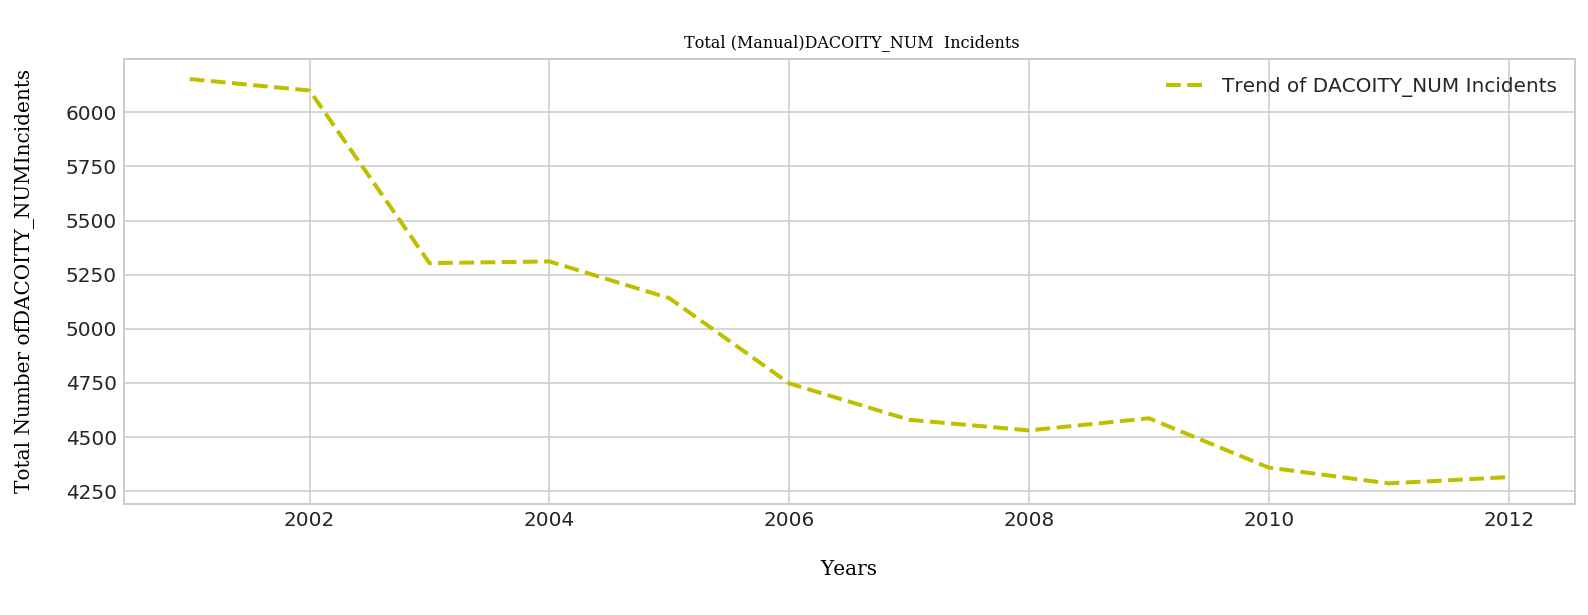

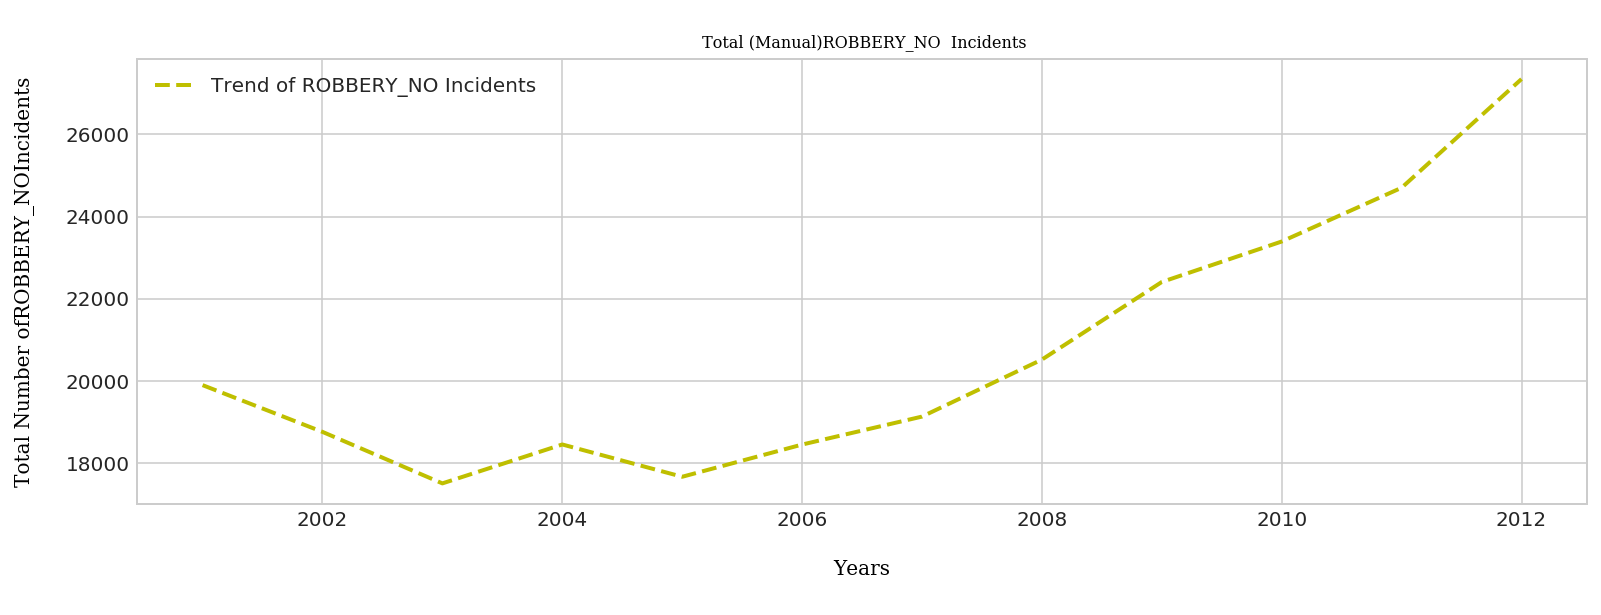

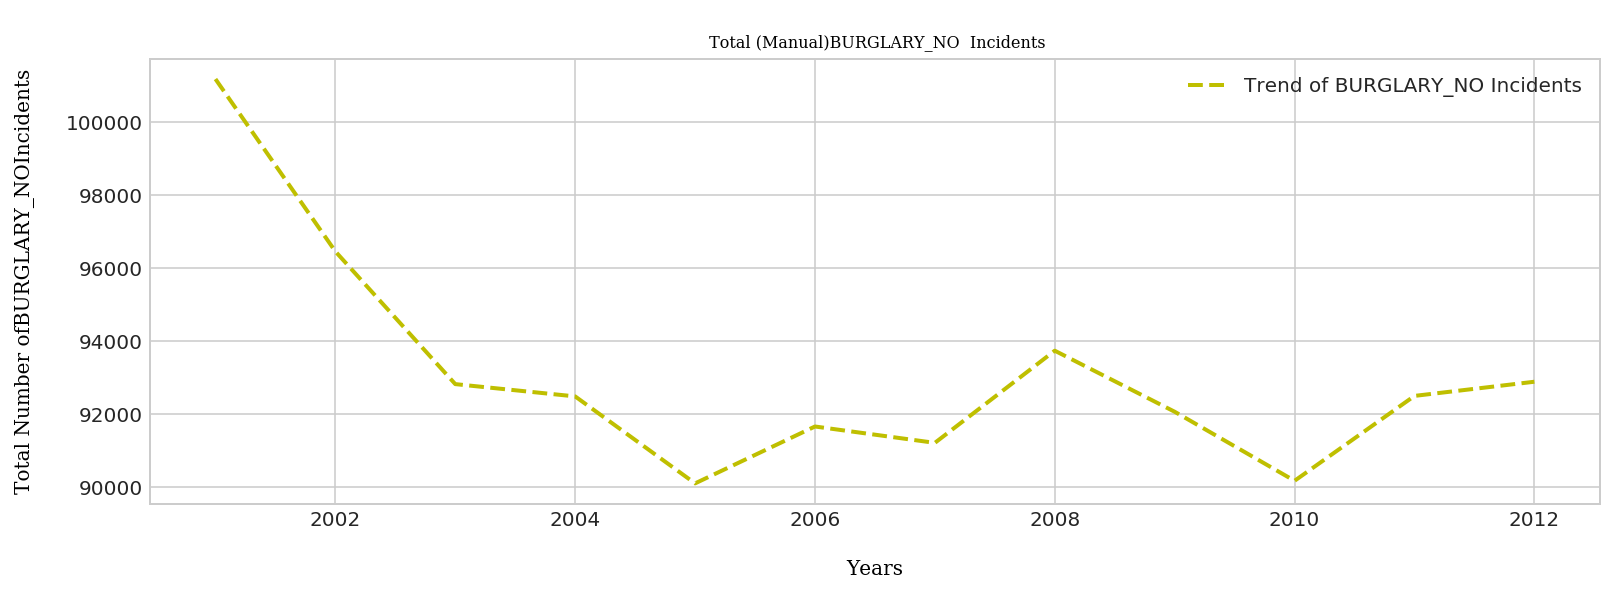

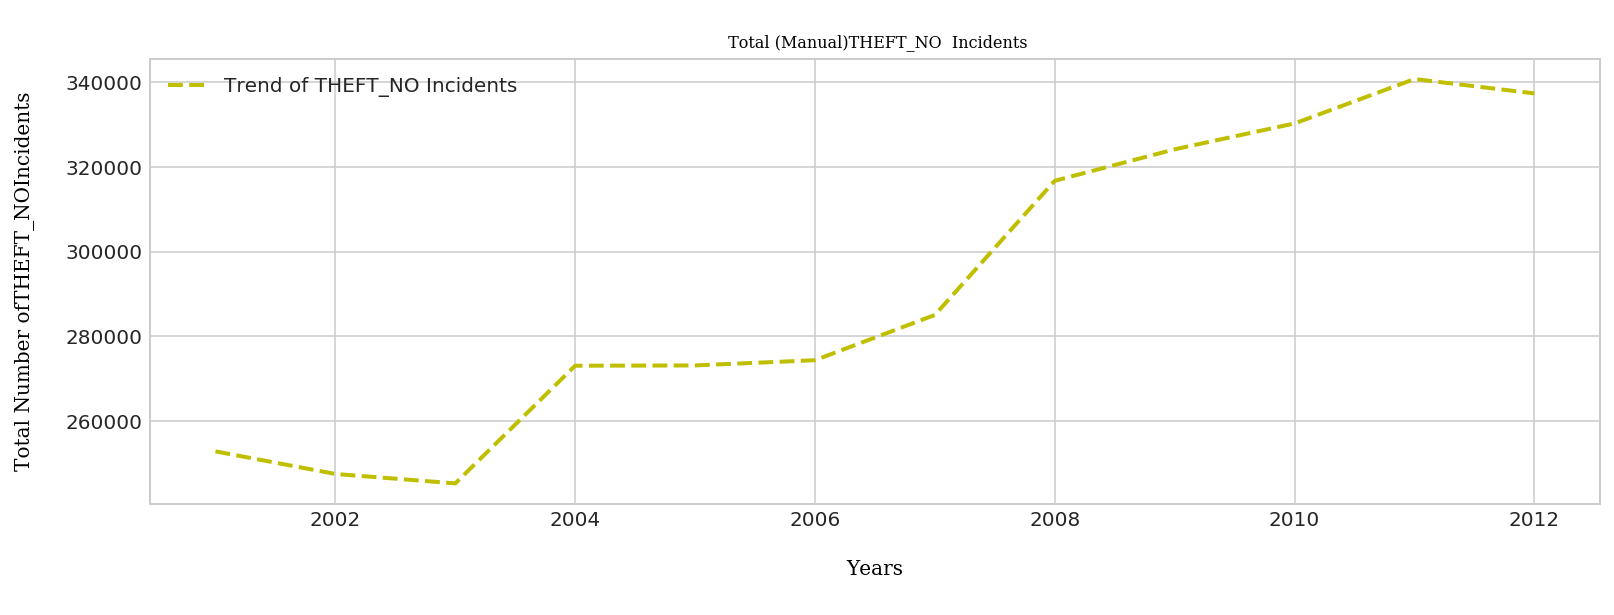

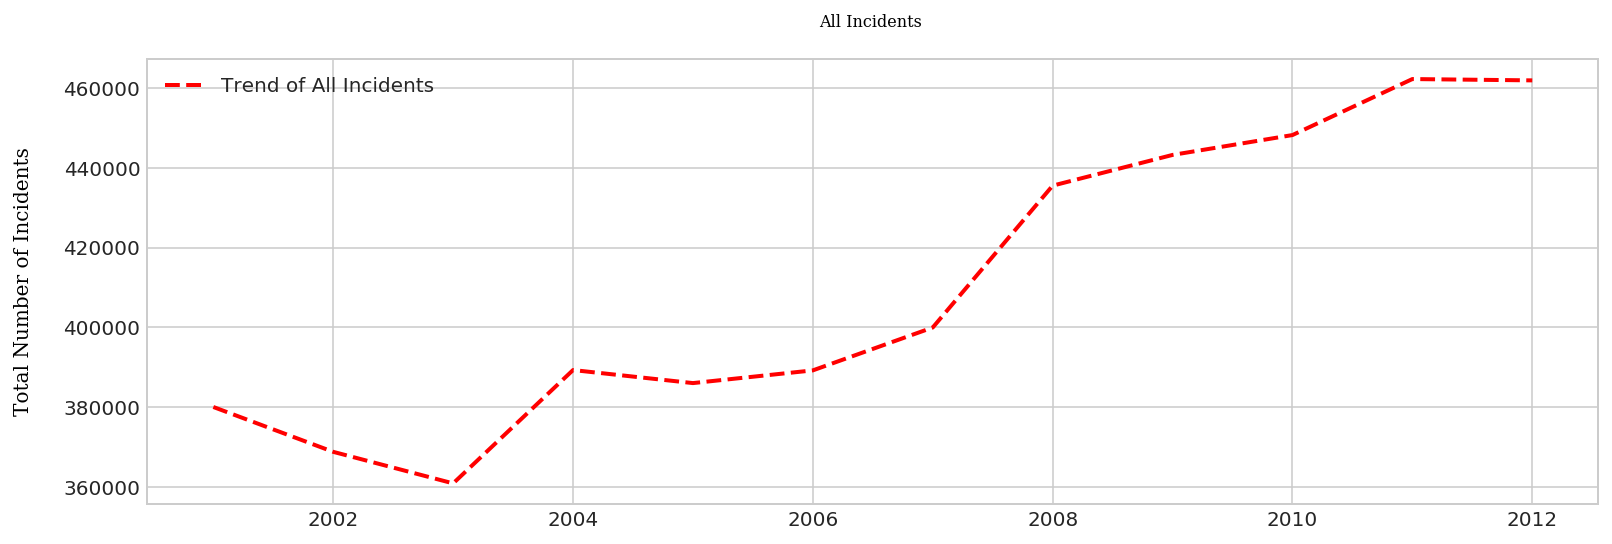

,YEAR,DACOITY_NUM,ROBBERY_NO,BURGLARY_NO,THEFT_NO,number_incidents
0,2001,6154,19901,101182,252803,380040
1,2002,6101,18764,96461,247462,368788
2,2003,5303,17512,92827,245237,360879
3,2004,5311,18458,92490,273045,389304
4,2005,5141,17673,90108,273111,386033
5,2006,4747,18456,91666,274354,389223
6,2007,4579,19136,91218,285043,399976
7,2008,4530,20522,93742,316761,435555
8,2009,4586,22409,92070,324195,443260
9,2010,4358,23393,90179,330312,448242


In [16]:
subset_df_trends(df,group_by_col=['YEAR'], category='TOTAL (MANUAL)', col_name='number_incidents')